# Case Study: Classification

### Import libraries.

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import statistics as stats
import xlrd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [3]:
%ls

Cross table cc and acceptance.png      Voldemort-Project/
Cross table income and acceptance.png  Voldemort_Classification.ipynb
Voldemort Classification.ipynb copy    creditcardmarketing.xlsx


### import dataset.

In [4]:
df = pd.read_excel('creditcardmarketing.xlsx', engine="openpyxl")
df.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [5]:
# change the cols name and replace the spaces with _
#we want to make all the columns into lower case 
cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower().replace(" ", "_").replace("#", "n"))
cols
df.columns = cols

In [6]:
df.shape

(18000, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   n_bank_accounts_open  18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   n_credit_cards_held   18000 non-null  int64  
 9   n_homes_owned         18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

In [8]:
df.dtypes


customer_number           int64
offer_accepted           object
reward                   object
mailer_type              object
income_level             object
n_bank_accounts_open      int64
overdraft_protection     object
credit_rating            object
n_credit_cards_held       int64
n_homes_owned             int64
household_size            int64
own_your_home            object
average_balance         float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

In [9]:
df.describe()

,customer_number,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


## 1. Data Cleaning.

### 1.1 Check for NaN, duplicates, zeros.

In [10]:
#check for na values
missingdata = (df.isna().sum()/len(df))*100
missingdata

customer_number         0.000000
offer_accepted          0.000000
reward                  0.000000
mailer_type             0.000000
income_level            0.000000
n_bank_accounts_open    0.000000
overdraft_protection    0.000000
credit_rating           0.000000
n_credit_cards_held     0.000000
n_homes_owned           0.000000
household_size          0.000000
own_your_home           0.000000
average_balance         0.133333
q1_balance              0.133333
q2_balance              0.133333
q3_balance              0.133333
q4_balance              0.133333
dtype: float64

In [11]:
#checking for duplicates
df.duplicated(keep=False).sum()

0

In [12]:
# since the null values in the df are low we decide to drop the values equal to null
df.dropna(inplace=True)
df.shape

(17976, 17)

In [13]:
# create a df_original as backup of the dataframe
# we will work on df 
df_original = df.copy(deep=True)

### 1.1.2 Split dataset into numericals and categoricals variables.

In [14]:
#drop the variable customer number because inrelevant for the classification
df = df.drop(['customer_number'], axis=1)
df

,offer_accepted,reward,mailer_type,income_level,n_bank_accounts_open,overdraft_protection,credit_rating,n_credit_cards_held,n_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [15]:
df_original

,customer_number,offer_accepted,reward,mailer_type,income_level,n_bank_accounts_open,overdraft_protection,credit_rating,n_credit_cards_held,n_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [16]:
# deviding the numericals
nums = df._get_numeric_data()
nums

,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...
17995,1,1,1,5,167.50,136.0,65.0,71.0,398.0
17996,1,3,1,3,850.50,984.0,940.0,943.0,535.0
17997,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0
17998,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0


In [17]:
nums['n_bank_accounts_open'].unique()
# "bank_accounts_open" has just a range of 3 values
# so regardless the dtype, we will treat it as categorical data

array([1, 2, 3])

In [18]:
nums['n_homes_owned'].unique()
# range of 3 values

array([1, 2, 3])

In [19]:
nums['household_size'].unique()
# range of 9 values
# we will treat this column as categorical data

array([4, 5, 2, 6, 3, 1, 8, 9])

In [20]:
nums['n_credit_cards_held'].unique()
# range of 4 values

array([2, 1, 3, 4])

In [21]:
# add the fake numericals variables to a new variable
fake_nums = nums[['n_bank_accounts_open', 'n_credit_cards_held','n_homes_owned', 'household_size' ]]

In [22]:
# drop the fake numericals from the nums dataframe
nums= nums.drop(['n_bank_accounts_open', 'n_credit_cards_held','n_homes_owned', 'household_size' ], axis=1)
nums

,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1160.75,1669.0,877.0,1095.0,1002.0
1,147.25,39.0,106.0,78.0,366.0
2,276.50,367.0,352.0,145.0,242.0
3,1219.00,1578.0,1760.0,1119.0,419.0
4,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...
17995,167.50,136.0,65.0,71.0,398.0
17996,850.50,984.0,940.0,943.0,535.0
17997,1087.25,918.0,767.0,1170.0,1494.0
17998,1022.25,626.0,983.0,865.0,1615.0


In [23]:
# deviding the categoricals
cats = df.select_dtypes('object')


In [24]:
# concat the fake nums to the cats df
cats = pd.concat([cats, fake_nums], axis = 1)

In [25]:
cats

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size
0,No,Air Miles,Letter,High,No,High,No,1,2,1,4
1,No,Air Miles,Letter,Medium,No,Medium,Yes,1,2,2,5
2,No,Air Miles,Postcard,High,No,Medium,Yes,2,2,1,2
3,No,Air Miles,Letter,Medium,No,High,No,2,1,1,4
4,No,Air Miles,Letter,Medium,No,Medium,Yes,1,2,1,6
...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,No,Low,Yes,1,1,1,5
17996,No,Cash Back,Letter,High,No,Low,Yes,1,3,1,3
17997,No,Cash Back,Letter,High,No,Low,No,1,2,1,4
17998,No,Cash Back,Letter,Medium,No,Medium,Yes,1,4,2,2


## 2  EDA.

### 2.1 EDA: Numericals

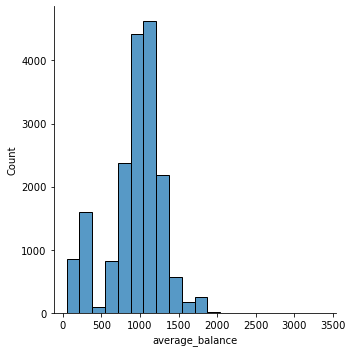

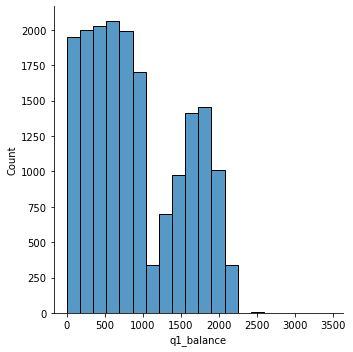

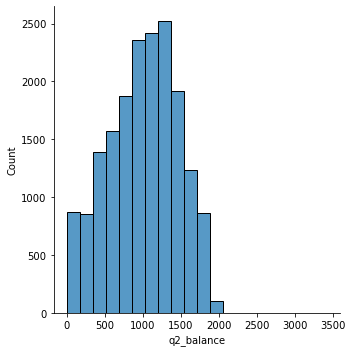

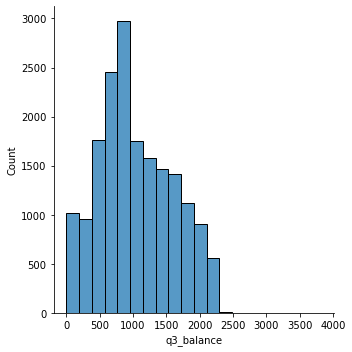

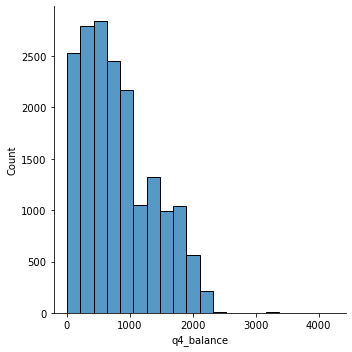

In [26]:
# show the distribution of all the variables
# Numericals EDA
for col in nums.columns:
    sns.displot(nums[col], bins=20)
    plt.show()

In [27]:
#sns.pairplot(nums)

In [28]:
correlations= df.corr()
correlations

# some correlation has been found among avg_balance and q2, q3.
# it is quite clear since the avg has been obtained using the q1,2,3,4

,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
n_bank_accounts_open,1.000000,-0.001633,0.004762,0.008622,-0.003909,-0.002814,-0.007956,0.000190,-0.000356
n_credit_cards_held,-0.001633,1.000000,-0.002390,-0.003040,-0.003469,-0.009446,-0.007373,-0.007623,0.015362
n_homes_owned,0.004762,-0.002390,1.000000,0.005227,0.017967,0.013143,0.009758,0.007775,0.014775
household_size,0.008622,-0.003040,0.005227,1.000000,-0.003582,-0.005080,-0.008766,0.003633,0.000232
average_balance,-0.003909,-0.003469,0.017967,-0.003582,1.000000,0.481507,0.800285,0.752741,0.572380
q1_balance,-0.002814,-0.009446,0.013143,-0.005080,0.481507,1.000000,0.483134,-0.060961,-0.237283
q2_balance,-0.007956,-0.007373,0.009758,-0.008766,0.800285,0.483134,1.000000,0.487710,0.168955
q3_balance,0.000190,-0.007623,0.007775,0.003633,0.752741,-0.060961,0.487710,1.000000,0.565298
q4_balance,-0.000356,0.015362,0.014775,0.000232,0.572380,-0.237283,0.168955,0.565298,1.000000


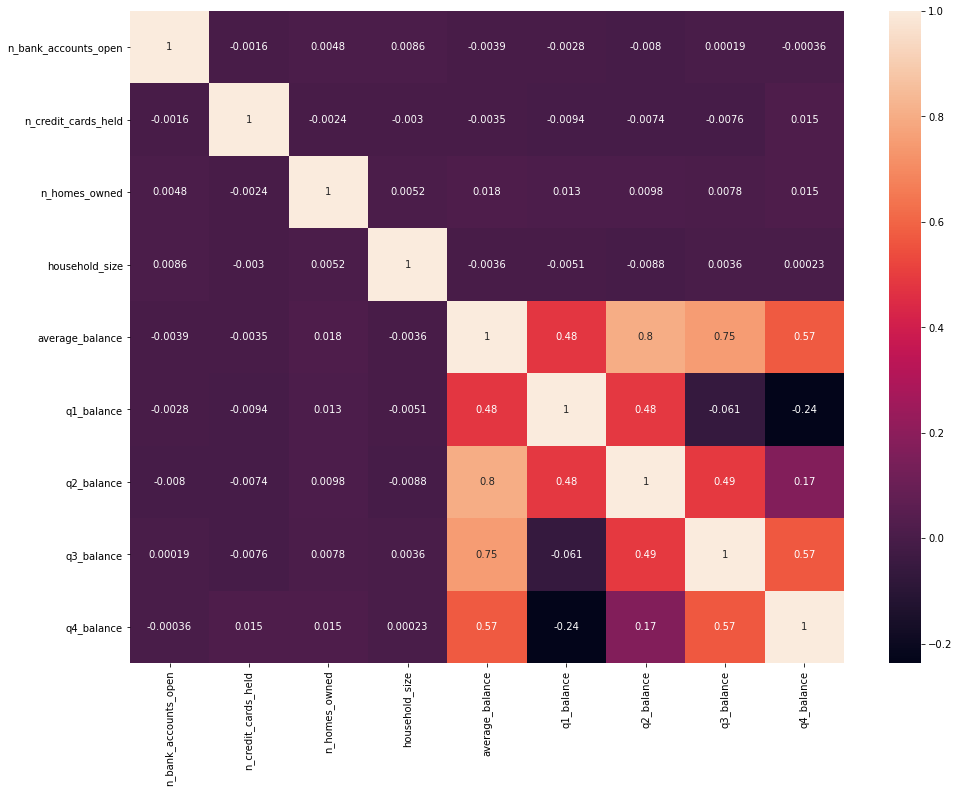

In [29]:
plt.figure(figsize=(16,12))
sns.heatmap(correlations, annot=True)
plt.show()





In [30]:
# dropping the q1,2,3,4 because of the correlation 
nums = nums.drop(['q1_balance', 'q2_balance','q3_balance', 'q4_balance' ], axis=1)
nums

,average_balance
0,1160.75
1,147.25
2,276.50
3,1219.00
4,1211.00
...,...
17995,167.50
17996,850.50
17997,1087.25
17998,1022.25


### 2.1 EDA: Categoricals

In [31]:
## checking all the categorical columns
#cols_cat = cats.columns

#for col in cols_cat:
   # print("Frequency analysis of column: ",col)
   # my_data = cats[col].value_counts().reset_index()
   # ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
   # plt.figure()
   # print

We can clearly see that the target variable has imbalanced data. We will have to applysome technique to balance them: SMOTE, Tomek, up/down sampling.

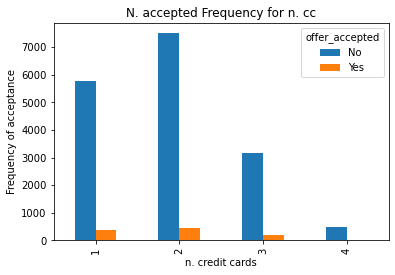

In [32]:
# trying some cross tabs to see which is the best predictor of the target var
%matplotlib inline
pd.crosstab(df.n_credit_cards_held,df.offer_accepted).plot(kind='bar')
plt.title('N. accepted Frequency for n. cc')
plt.xlabel('n. credit cards')
plt.ylabel('Frequency of acceptance')
plt.savefig('Cross table cc and acceptance')

# it seems that there is someconnection between the income level and the target variable

## 3. Pre-processing


### 3.1 Pre-processing variables: Numerics.

In [33]:
from sklearn.preprocessing import StandardScaler
cols_nums = nums.columns

for c in cols_nums:   # we'll normalize all except the target column
    nums[c]=StandardScaler().fit_transform(nums[c].values.reshape(-1, 1))

In [34]:
nums.head()

,average_balance
0,0.628724
1,-2.264609
2,-1.895627
3,0.795015
4,0.772177


### 3.2 Pre-processing variables: Categoricals

In [35]:
cats = pd.get_dummies(cats ,drop_first=True)
cats.head()
# could choose to drop first column 

,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes
0,1,2,1,4,0,0,0,0,0,0,0,0,0,0
1,1,2,2,5,0,0,0,0,0,1,0,0,1,1
2,2,2,1,2,0,0,0,1,0,0,0,0,1,1
3,2,1,1,4,0,0,0,0,0,1,0,0,0,0
4,1,2,1,6,0,0,0,0,0,1,0,0,1,1


### 3.3 Isolate target variable, and concatenate the dependent variables

In [36]:
y = cats['offer_accepted_Yes']
cats = cats.drop(['offer_accepted_Yes'], axis = 1)
cats

,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes
0,1,2,1,4,0,0,0,0,0,0,0,0,0
1,1,2,2,5,0,0,0,0,1,0,0,1,1
2,2,2,1,2,0,0,1,0,0,0,0,1,1
3,2,1,1,4,0,0,0,0,1,0,0,0,0
4,1,2,1,6,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,1,1,1,5,1,0,0,0,0,0,1,0,1
17996,1,3,1,3,1,0,0,0,0,0,1,0,1
17997,1,2,1,4,1,0,0,0,0,0,1,0,0
17998,1,4,2,2,1,0,0,0,1,0,0,1,1


In [37]:
# bring the numerical data (scaled)in with the x cats
X = pd.concat([cats, nums], axis = 1)

In [38]:
X.head()

,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes,average_balance
0,1,2,1,4,0,0,0,0,0,0,0,0,0,0.628724
1,1,2,2,5,0,0,0,0,1,0,0,1,1,-2.264609
2,2,2,1,2,0,0,1,0,0,0,0,1,1,-1.895627
3,2,1,1,4,0,0,0,0,1,0,0,0,0,0.795015
4,1,2,1,6,0,0,0,0,1,0,0,1,1,0.772177


## 4. Model Preparation
Remember: chek that the database is splitted, then devide the db in train X and test sample Y. Check for imbalanced Target data.

In [39]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
import math

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

### 4.1 tt split, get model

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.4, random_state=40)
print("y_test:\n",y_test.value_counts())
print("y_train:\n", y_train.value_counts())

### 4.3 apply model and train model 

In [41]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)

### 4.4 evaluate accuracy and test 


In [42]:
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)

In [43]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

### 4.5 Check results and accuracy

In [44]:
accuracy_score(y_test, predictions)

0.9411764705882353

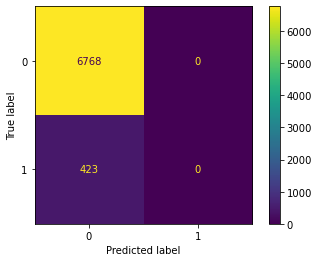

In [45]:
# now we the st the model 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

accuracy_score(y_test,predictions)
confusion_matrix(y_test,predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()

In [ ]:
# as expected with imbalanced data the model recognise very well the negative values but not the positive ones
# we need to rebalance the data sample

### - 2nd Iteration -

In [ ]:
# 5.6 applying SMOTE to get rid of imbalance - (oversample the minority class of the target label)¶



In [46]:
y.value_counts()

0    16955
1     1021
Name: offer_accepted_Yes, dtype: int64

In [48]:
# oversampling with Smote technique
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)
y_sm.value_counts()

0    16955
1    16955
Name: offer_accepted_Yes, dtype: int64

In [49]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.4, random_state=40)

In [50]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)

In [51]:
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)

In [52]:
accuracy_score(y_test, predictions)

0.7094514892362135

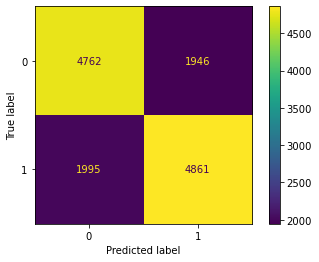

In [53]:
# now we the st the model 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

accuracy_score(y_test,predictions)
confusion_matrix(y_test,predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()

In [ ]:
# the model now is able to recognise also the positive values, however it is less accurate than before. 
# we should try hybrid and undersampling

## - 3rd Iteration -

In [ ]:
# during this iteration we will drop one of categorical col and run the logistic regression model with a smote sampling technique

In [60]:
cats.head()

,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes
0,1,2,1,4,0,0,0,0,0,0,0,0,0
1,1,2,2,5,0,0,0,0,1,0,0,1,1
2,2,2,1,2,0,0,1,0,0,0,0,1,1
3,2,1,1,4,0,0,0,0,1,0,0,0,0
4,1,2,1,6,0,0,0,0,1,0,0,1,1


In [61]:
# n_homes_owned is redundant and a repetition of own_your_home_Yes, thus we drop it!

In [62]:
cats_two = cats.drop(['n_homes_owned'], axis = 1)


In [63]:
# Now we concat the cats_two with the nums

In [64]:
# bring the numerical data (scaled)in with the x cats
X2 = X.drop(['n_homes_owned'], axis = 1)
X2

,n_bank_accounts_open,n_credit_cards_held,household_size,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes,average_balance
0,1,2,4,0,0,0,0,0,0,0,0,0,0.628724
1,1,2,5,0,0,0,0,1,0,0,1,1,-2.264609
2,2,2,2,0,0,1,0,0,0,0,1,1,-1.895627
3,2,1,4,0,0,0,0,1,0,0,0,0,0.795015
4,1,2,6,0,0,0,0,1,0,0,1,1,0.772177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33905,2,1,3,1,0,1,0,1,0,1,0,0,0.961172
33906,1,3,4,0,0,0,0,0,0,1,0,0,-1.862811
33907,1,3,3,0,0,1,0,1,0,0,0,1,-0.465177
33908,1,2,5,0,1,1,1,0,0,1,0,0,0.363975


In [73]:
# we run the same model of the 2nd iteration with the X2 varibles
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X2, y)
y.value_counts()

0    16955
1    16955
Name: offer_accepted_Yes, dtype: int64

In [74]:
X_train, X_test, y_train, y_test =train_test_split(X2, y, test_size= 0.4, random_state=40)

In [75]:
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)

In [76]:
accuracy_score(y_test, predictions)

0.703332350339133

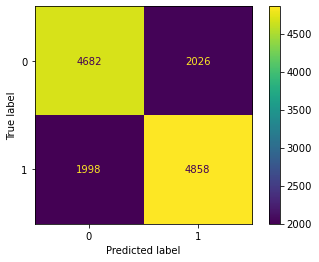

In [77]:
# now we the st the model 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

accuracy_score(y_test,predictions)
confusion_matrix(y_test,predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()

## - 4th Iteration -



In [ ]:
# combination of random oversampling and undersampling for imbalanced classification


In [70]:
from imblearn.combine import SMOTETomek
from collections import Counter

smt = SMOTETomek(random_state = 42)
X_smt, y_smt = smt.fit_resample(X, y)



In [71]:
# summarize class distribution
counter = Counter(y_smt)
print(counter)

Counter({0: 15844, 1: 15844})


In [72]:
X_train, X_test, y_train, y_test =train_test_split(X_smt, y_smt, test_size= 0.4, random_state=40)
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)
accuracy_score(y_test, predictions)

0.7167876301672452

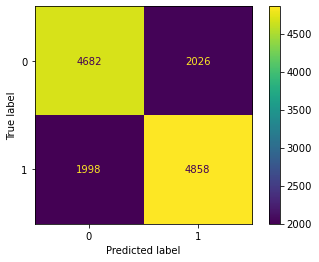

In [78]:
# now we the st the model 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

accuracy_score(y_test,predictions)
confusion_matrix(y_test,predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()

In [ ]:
# the accurcy didn't change much with the new technique

## - 5th Iteration -


In [ ]:
# Now we work with the hybrid resample data and a random forest model.

Random Forest:
The accuracy of the model on test set is:  0.8687702742553819
Kappa:  0.7374146551298105
ROC-AUC score:  0.8685744359301386
F1 score:  0.8722732491389207
Confusion Matrix - raw:


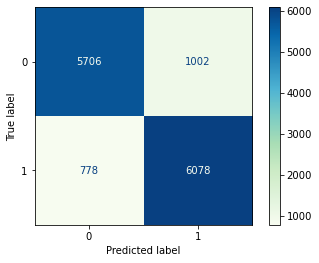

Confusion Matrix - normalised row-wise:


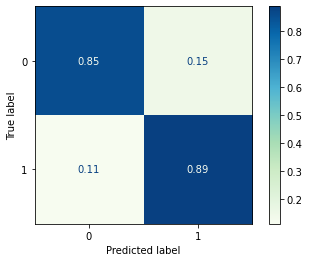

SyntaxError: 'return' outside function (<ipython-input-80-0631321941e5>, line 18)

In [80]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
print ("Random Forest:")
predictions = model.predict(X_test)

#calculate scores. Kappa/ROC-AUC/F1 were chosen and should be as high as possible 0-1
print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions)) 
print("Kappa: ", cohen_kappa_score(y_test, predictions))   
print("ROC-AUC score: ", roc_auc_score(y_test, predictions)) 
print("F1 score: ", f1_score(y_test, predictions))  
#generate confusion matrices with raw and normalised values
print ("Confusion Matrix - raw:")
plot_confusion_matrix(model, X_test, y_test, cmap = "GnBu")
plt.show() 
print ("Confusion Matrix - normalised row-wise:")
plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = "GnBu")
plt.show() 
return [model, predictions]

In [ ]:
# This model is the most accurate of the ones tried so far
# Our marketing plan will be based on this

### Computing and plotting ROC curve values¶


In [81]:
import sklearn.metrics as metrics

In [82]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)


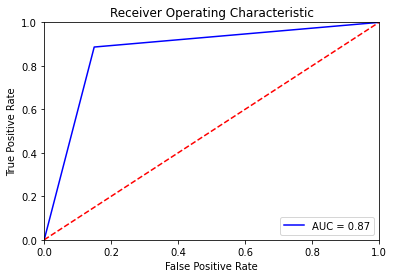

In [83]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
